In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import expipe
import pathlib
import numpy as np
import sys
sys.path.append('../ca2-mec')
import data_processing as dp #OBS: bruker fortsatt data_processing
from trackunitmulticomparison import TrackMultipleSessions
from registration import store_notebook
import re
import joblib
import multiprocessing
import shutil
import psutil
import pandas as pd
import matplotlib.pyplot as plt
import quantities as pq
import exdir
from distutils.dir_util import copy_tree
from datetime import timedelta
from tqdm import tqdm_notebook as tqdm
import networkx as nx
#from nxpd import draw
%matplotlib inline

In [3]:
project_path = dp.project_path()
project = expipe.get_project(project_path)
actions = project.actions

identify_neurons = project.require_action('identify-neurons')
data_loader = dp.Data()

In [4]:
#include = ['027-251022-2', '027-251022-3', '027-251022-4', '027-251022-5', '027-251022-6', '027-251022-7']

#CA2 rotte 001:
include = ['001-181220-2', '001-181220-3', '001-181220-4', '001-181220-5', '001-181220-6'] #social NO1
#include = ['001-191220-1', '001-191220-3', '001-191220-6', '001-191220-7', '001-191220-8'] #object NO1

#CA2 rotte 007:
#include = ['007-081221-1', '007-081221-2', '007-081221-3', '007-081221-4', '007-081221-5', '007-081221-6'] #social NO1
#include = ['007-091221-1', '007-091221-2', '007-091221-3', '007-091221-4', '007-091221-5', '007-091221-7'] #object NO1

#CA2 rotte 011:
#include = ['011-120321-2', '011-120321-3', '011-120321-4', '011-120321-5', '011-120321-6']

#include = ['013-050521-1', '013-050521-2', '013-050521-3', '013-050521-4', '013-050521-5']
#include = ['001-181220-2', '001-181220-3', '001-181220-4', '001-181220-5', '001-181220-6', 
#        '001-191220-1', '001-191220-3', '001-191220-6', '001-191220-7', '001-191220-8']
           #'001-211220-1', '001-211220-2', '001-211220-3', '001-211220-4', '001-211220-5',
           #'001-221220-1', '001-221220-2', '001-221220-3', '001-221220-4', '001-221220-5']
#include = ['001-181220-2', '001-181220-3', '001-181220-4', '001-181220-5', '001-181220-6'] #socialNO1
#include = ['001-191220-1', '001-191220-3', '001-191220-6', '001-191220-7', '001-191220-8'] #objectNO1
#include = ['001-181220-2', '001-181220-3', '001-181220-4', '001-181220-5', '001-181220-6', '001-191220-1', '001-191220-3', '001-191220-6', '001-191220-7', '001-191220-8']
#include = ['001-211220-1', '001-211220-2', '001-211220-3', '001-211220-4', '001-211220-5']
#include = ['001-181220-2', '001-211220-1']
#include = ['001-211220-1', '001-211220-2', '001-211220-3', '001-211220-4', '001-211220-5',
#         '001-221220-1', '001-221220-2', '001-221220-3', '001-221220-4', '001-221220-5']
#include = ['001-280721-1', '001-280721-2', '001-280721-3', '001-280721-4', '001-280721-5'] #Maria sine opptak fra MEC
#include = ['002-050721-1', '002-050721-2', '002-050721-3', '002-050721-4', '002-050721-5'] #Maria sine opptak fra MEC
#include = ['001-191220-8', '001-211220-1'] 

#include = ['013-050521-1', '013-050521-2', '013-050521-3', '013-050521-4', '013-050521-5']
#include = ['011-120321-2', '011-120321-3', '011-120321-4', '011-120321-5', '011-120321-6']
#include = ['022-160322-1', '022-160322-2', '022-160322-3', '022-160322-4', '022-160322-5', '022-160322-7']
#include = ['007-081221-1','007-081221-2','007-081221-3', '007-081221-4','007-081221-5','007-081221-6']

#CA1
#include = ['144-100621-1', '144-100621-2', '144-100621-3', '144-100621-4', '144-100621-5'] #socialNO1

# find the complement of include
skip_actions = []
for action in actions:
    if action not in include:
        skip_actions.append(action)
skip_actions, include

(['001-1181220-2',
  '001-191220-1',
  '001-191220-3',
  '001-191220-6',
  '001-191220-7',
  '001-191220-8',
  '001-211220-1',
  '001-211220-2',
  '001-211220-3',
  '001-211220-4',
  '001-211220-5',
  '001-221220-1',
  '001-221220-2',
  '001-221220-3',
  '001-221220-4',
  '001-221220-5',
  '001-280721-1',
  '001-280721-2',
  '001-280721-3',
  '001-280721-4',
  '001-280721-5',
  '001-adjustment',
  '001-surgery-implantation',
  '002-050721-1',
  '002-050721-2',
  '002-050721-3',
  '002-050721-3 - Copy',
  '002-050721-4',
  '002-050721-4 - Copy',
  '002-050721-5',
  '002-050721-5 - Copy',
  '002-070721-3',
  '002-241022-1',
  '007-081221-1',
  '007-081221-1 - Copy',
  '007-081221-2',
  '007-081221-2 - Copy',
  '007-081221-3',
  '007-081221-3 - Copy',
  '007-081221-4',
  '007-081221-4 - Copy',
  '007-081221-5',
  '007-081221-5 - Copy',
  '007-081221-6',
  '007-081221-6 - Copy',
  '007-091221-1',
  '007-091221-1 - Copy',
  '007-091221-2',
  '007-091221-2 - Copy',
  '007-091221-3',
  '007-0

In [5]:
sessions = []
for action in actions.values():
    if action.id in skip_actions:
        continue
    if action.type != 'Recording':
        continue
    print(action.id)
    action_data_path = dp.get_data_path(action)
    exdir_object =  exdir.File(action_data_path)
    if 'processing' not in exdir_object:
        continue
        
    processing = exdir_object['processing']
    
    if not 'electrophysiology' in processing:
        continue
    elphys = processing['electrophysiology']
    if 'spikesorting' not in elphys:
        continue  

    sessions.append({
       'action': action.id,
       'session': int(action.id.split('-')[-1]),
       'entity': action.entities[0],

   })
sessions = pd.DataFrame(sessions)

001-181220-2
001-181220-3
001-181220-4
001-181220-5
001-181220-6


In [6]:
sessions['date'] = sessions.apply(lambda x: x.action.split('-')[1], axis=1)
sessions['entity_date'] = sessions.apply(lambda x: '-'.join(x.action.split('-')[:2]), axis=1)
sessions.to_csv(identify_neurons.data_path() / 'sessions.csv', index=False)
sessions

,action,session,entity,date,entity_date
0,001-181220-2,2,001,181220,001-181220
1,001-181220-3,3,001,181220,001-181220
2,001-181220-4,4,001,181220,001-181220
3,001-181220-5,5,001,181220,001-181220
4,001-181220-6,6,001,181220,001-181220


# Identify unique neurons

In [7]:
sessions_include = sessions
sessions_include

#sessions_include = sessions.query("action.isin(@immutable_include)")


#Older option for this cell:
#sessions_include = sessions.query("action.isin(@include)")
#sessions_include


,action,session,entity,date,entity_date
0,001-181220-2,2,001,181220,001-181220
1,001-181220-3,3,001,181220,001-181220
2,001-181220-4,4,001,181220,001-181220
3,001-181220-5,5,001,181220,001-181220
4,001-181220-6,6,001,181220,001-181220


In [8]:
# save graphs
for entity, values in sessions_include.groupby('entity'):
    print(entity, values)
    data_path = identify_neurons.data_path() / f'{entity}-graphs'
    if data_path.exists():
        shutil.rmtree(data_path)
#         continue
    unit_matching = TrackMultipleSessions(
        actions, action_list=values.action.values.tolist(), 
        progress_bar=tqdm, verbose=False, data_path=data_path
    )
    unit_matching.do_matching()
    unit_matching.make_graphs_from_matches()
#     unit_matching.compute_time_delta_edges()
    unit_matching.compute_depth_delta_edges()
    # save graph with all dissimilarities for later use
    unit_matching.save_graphs()

001          action  session entity    date entity_date
0  001-181220-2        2    001  181220  001-181220
1  001-181220-3        3    001  181220  001-181220
2  001-181220-4        4    001  181220  001-181220
3  001-181220-5        5    001  181220  001-181220
4  001-181220-6        6    001  181220  001-181220


  0%|          | 0/10 [00:00<?, ?it/s]

# Plot comparisons

In [9]:
entity = "001"
unit_comp = TrackMultipleSessions(
    actions, sessions_include.action.values, data_path=identify_neurons.data_path() / f'{entity}-graphs')

unit_comp.load_graphs()

In [10]:
max_dissimilarity = 0.05 #default is 0.05
max_depth_delta = 100

unit_comp.remove_edges_above_threshold('weight', max_dissimilarity)
unit_comp.remove_edges_above_threshold('depth_delta', max_depth_delta)

unit_comp.remove_edges_with_duplicate_actions()
unit_comp.identify_units()

Zero units found on channel group 4
Zero units found on channel group 5
Zero units found on channel group 6
Zero units found on channel group 7


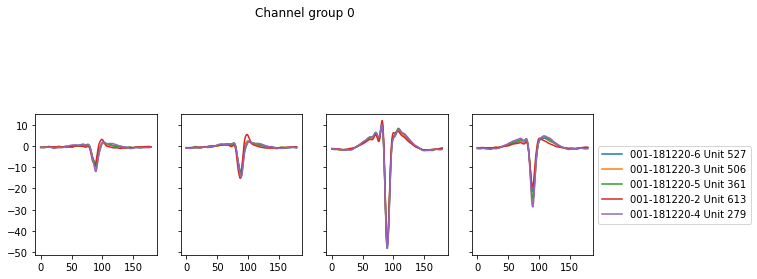

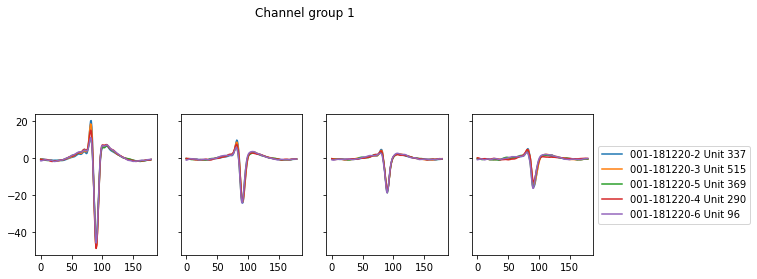

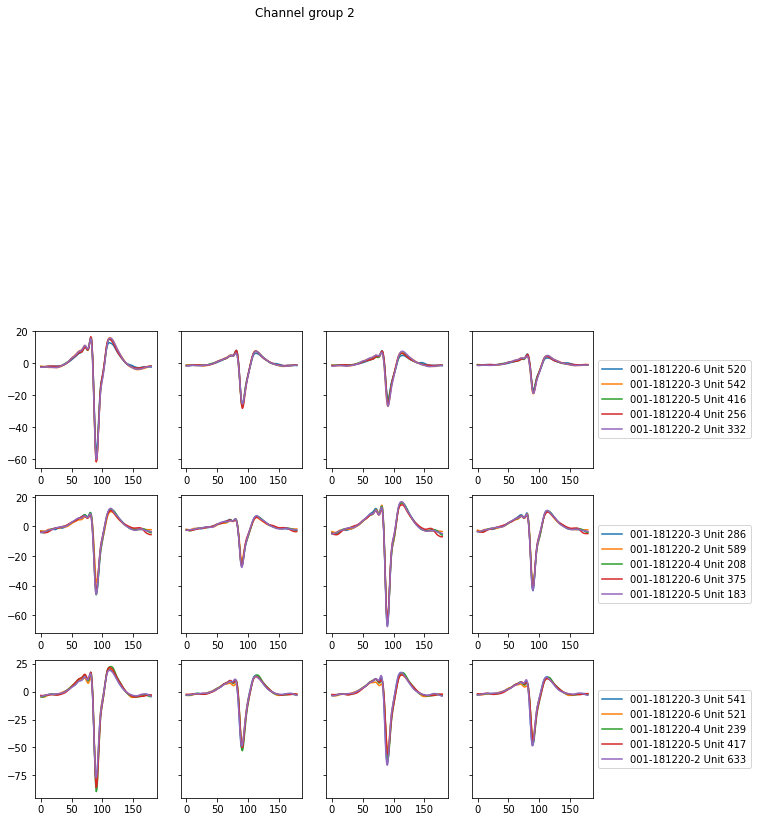

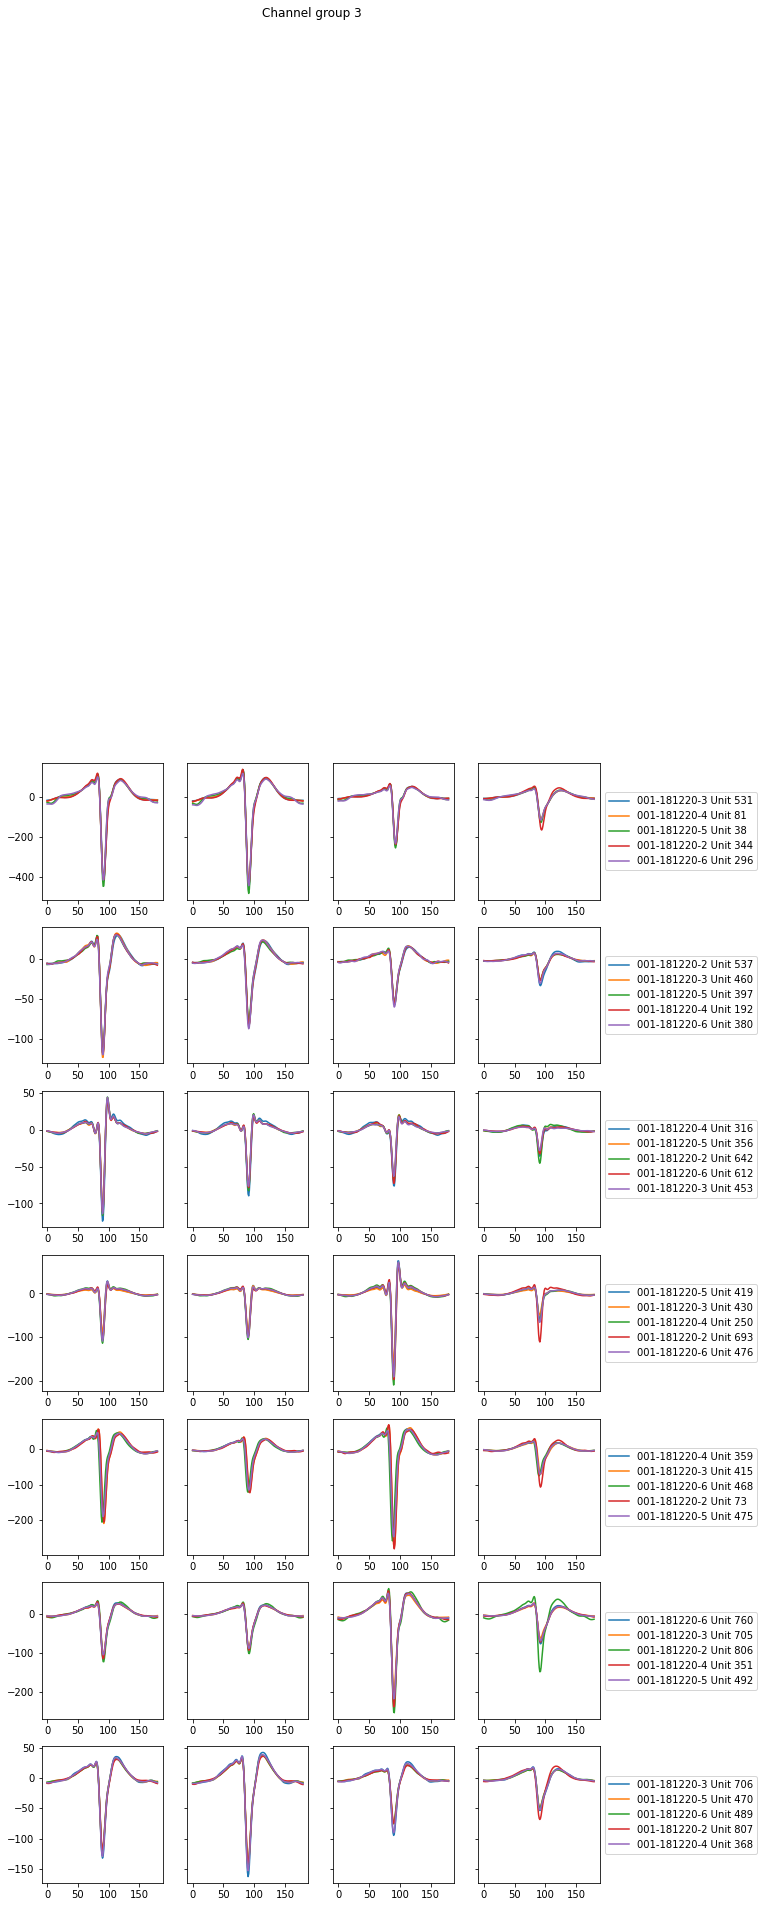

In [11]:
#unit_comp.plot_matches('template', chan_group=1, step_color=False)
unit_comp.plot_matches('template', step_color=False)

#plt.tight_layout()

# Store uniqe unit ids to csv

In [12]:
max_dissimilarity = .05 #default 0.05
max_depth_delta = 100
id_nums = {}
num = 0
output = identify_neurons.data_path()

for entity, values in sessions_include.groupby('entity'):
    data_path = output / f'{entity}-graphs'
    unit_matching = TrackMultipleSessions(
        actions, values.action.values.tolist(), 
        progress_bar=tqdm, verbose=False, data_path=data_path
    )
    unit_matching.load_graphs()
    # cutoff large dissimilarities
    unit_matching.remove_edges_above_threshold('weight', max_dissimilarity)
    unit_matching.remove_edges_above_threshold('depth_delta', max_depth_delta)
    unit_matching.remove_edges_with_duplicate_actions()
    unit_matching.identify_units()
    units = []
    for ch, group in unit_matching.identified_units.items():
        for unit_id, val in group.items():
            for action_id, orig_unit_ids in val['original_unit_ids'].items():
                if unit_id not in id_nums:
                    id_nums[unit_id] = num
                    num += 1
                units.extend([
                    {
                        'unit_name': name, 
                        'unit_idnum': id_nums[unit_id],
                        'unit_id': unit_id, 
                        'action': action_id,
                        'channel_group': ch,
                        'max_dissimilarity': max_dissimilarity,
                        'max_depth_delta': max_depth_delta
                    } 
                    for name in orig_unit_ids])
    units = pd.DataFrame(units)
    units = units[~units.action.isin(skip_actions)]
    units.to_csv(output / f'{entity}-units.csv', index=False) 

In [13]:
unique_units = pd.concat([
    pd.read_csv(p) 
    for p in output.iterdir() 
    if p.name.endswith('-units.csv')])

In [14]:
unique_units.to_csv(output / 'units.csv', index=False)

# Store results in Expipe action

In [15]:
identify_neurons.data['sessions'] = 'sessions.csv'
identify_neurons.data['units'] = 'units.csv'

In [16]:
#copy_tree(output, str(identify_neurons.data_path()))

In [17]:
store_notebook(
    identify_neurons, "00-identify-neurons.ipynb")

## Load and view results

In [18]:
pd.read_csv(output / "units.csv")

,unit_name,unit_idnum,unit_id,action,channel_group,max_dissimilarity,max_depth_delta
0,241,0,7320388a-c5d6-4e5b-9274-29f1463cd0ac,001-191220-6,0,0.05,100
1,637,0,7320388a-c5d6-4e5b-9274-29f1463cd0ac,001-191220-7,0,0.05,100
2,238,0,7320388a-c5d6-4e5b-9274-29f1463cd0ac,001-191220-3,0,0.05,100
3,350,0,7320388a-c5d6-4e5b-9274-29f1463cd0ac,001-191220-8,0,0.05,100
4,202,0,7320388a-c5d6-4e5b-9274-29f1463cd0ac,001-191220-1,0,0.05,100
...,...,...,...,...,...,...,...
1479,78,26,dca6136b-b558-41dd-9afc-ed38f862ff80,144-100621-2,7,0.05,100
1480,68,26,dca6136b-b558-41dd-9afc-ed38f862ff80,144-100621-3,7,0.05,100
1481,71,26,dca6136b-b558-41dd-9afc-ed38f862ff80,144-100621-1,7,0.05,100
1482,35,26,dca6136b-b558-41dd-9afc-ed38f862ff80,144-100621-4,7,0.05,100


In [19]:
pd.read_csv(output / "units.csv")["unit_id"].unique()

array(['7320388a-c5d6-4e5b-9274-29f1463cd0ac',
       '382a8dbc-e9eb-45a4-9d0e-fb9d6d34aa7b',
       'bf6af056-5916-48ed-b9dd-cd85c46d02f8',
       '6f9ff7aa-fc36-4639-95eb-7863f7e39871',
       '4d620719-72f7-47b8-8475-dd230cc0cf43',
       '5a05147e-128c-40d0-a3e5-ea0ad2c4eefe',
       '997d2948-8e83-40e2-bfa0-ece2b4b520a8',
       'c8d9a6f9-e311-4843-a213-5cecad16ff93',
       '8ebc03e4-4169-4f3d-bc84-121e823626e6',
       '2edc6113-03a4-4f0d-b51d-ac43639e6664',
       'df5243cd-a5fe-447c-ab1e-f0ca45ff580d',
       '0436f3a7-98e9-4c7e-a0d4-968633c23559',
       'd96daab1-7411-4c7e-a4df-17a8962ab5b7',
       '6a075d1e-dc89-4e6b-bd20-fedd1a0032ed',
       '14f1a1c5-373d-45f9-a1a9-1fb7bc975760',
       '6fbb8c5c-43d1-48d3-90e5-be2714e1c126',
       '9cfe170d-89a9-4f02-adab-0dc23522d6c5',
       'e517fa24-bfcf-4725-8c67-a1174ecc7f77',
       'bb382e64-f451-4c2e-a823-cfbdd65dcbe3',
       '2d19e91a-31dd-4787-a4ee-c1c8b35cfc1e',
       '11f9d3b3-23a0-4f4c-b577-f38dca96588d',
       'f1fce